In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

pd.set_option("display.max_columns", None)
# hello

# Which varible(s) is/are the best predictor(s) of a car's fuel economy? 

 ### Your employer, a used car dealership, wants to increase inventory of cars with superior fuel economy and decrease purchases of cars with bad fuel economy. As a result, the stakeholder has requested a model that can predict the fuel economy of a car when that information is missing from the vehicle details.

### Additionally, the stakeholders have requested a dashboard that can display information that may be useful in making future purchases. 
* Which variable(s) are the best predictors of City MPG?
* Which variable(s) are the best predictors of Highway MPG?

In [46]:
cwd = os.getcwd()
data_import = pd.read_csv(cwd + "\Car_Price_Pred.csv")
data_import.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [121]:
raw_data = data_import.copy()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Analyze **Target** Variable : **Price**

In [139]:
from IPython.display import display_html 

# Create a copy of the data for analysis
data = raw_data.copy()

citympg_stats = pd.DataFrame(data["citympg"].describe())
highwaympg_stats = pd.DataFrame(data["highwaympg"].describe())

print("---------------")
print("City MPG Stats")
print("---------------")
display(citympg_stats)
print("")
print("------------------")
print("Highway MPG Stats")
print("------------------")
display(highwaympg_stats)

---------------
City MPG Stats
---------------


,citympg
count,205.000000
mean,25.219512
std,6.542142
min,13.000000
25%,19.000000
50%,24.000000
75%,30.000000
max,49.000000



------------------
Highway MPG Stats
------------------


,highwaympg
count,205.000000
mean,30.751220
std,6.886443
min,16.000000
25%,25.000000
50%,30.000000
75%,34.000000
max,54.000000


#### Numerical Variable Statistics

In [140]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Distribution of Numerical Variables

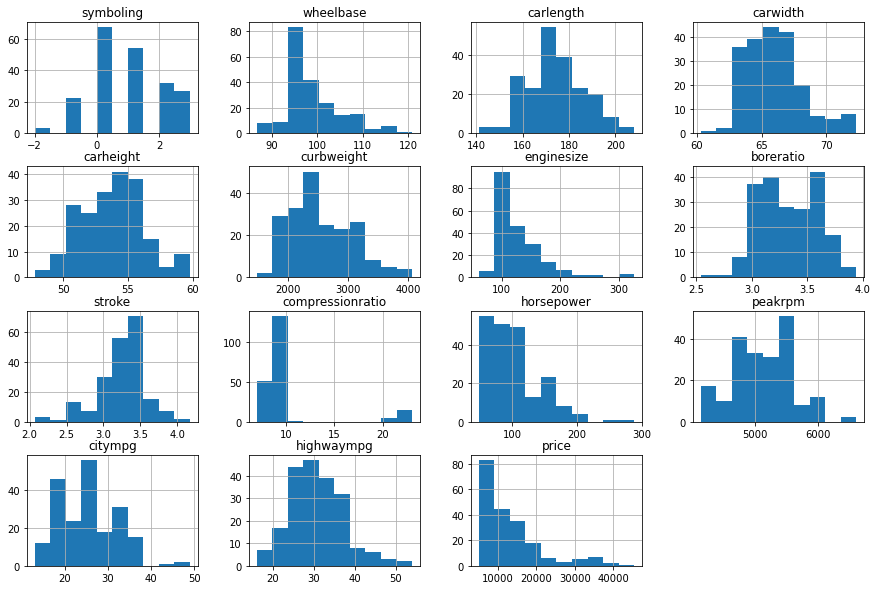

In [141]:
#fig, ax = plt.subplots(figsize=(10,6))
hist_data = data.drop("car_ID", axis=1)

ax = hist_data.hist(figsize=(15,10))
plt.show()

#### Create New Features
* Make
* Model
* "#" of doors

In [50]:
# Create make column using CarName variable
# Find the count of make
data["Make"] = data["CarName"].str.split(" ").str[0]
top_10_make = pd.Series(data["Make"].value_counts().head(n=10))
top_10_make_perc = pd.Series(data["Make"].value_counts(normalize=True).head(n=10))

px.bar(top_10_make, title="Top 10 Vehicle Manufacturers (Make)")

In [51]:
# Create a model columns
data["Model"] = data["CarName"].str.split(" ").str[1]
data["Model"].value_counts()

top_10_model = pd.Series(data["Model"].value_counts().head(n=10))
top_10_model_perc = pd.Series(data["Model"].value_counts(normalize=True).head(n=10))

px.bar(top_10_model, title="Top 10 Vehicle Models")

## Separate data into two dataframes: 
####                                    1.) Body Variables + Target 
####                                    2.) Engine Variables + Target

In [143]:
body_data_city = data[["citympg", "wheelbase", "carlength", "carwidth", "carheight", "curbweight"]]
engine_data_city = data[["citympg", "price", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "highwaympg", "peakrpm"]]

body_data_hwy = data[["highwaympg", "wheelbase", "carlength", "carwidth", "carheight", "curbweight"]]
engine_data_hwy = data[["highwaympg", "price", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "citympg", "peakrpm"]]


## Create Correlation Matricies w/Heatmaps

#### Body Data: **Curbweight** and **Carlength** have the strongest linear association with City MPG

,citympg,wheelbase,carlength,carwidth,carheight,curbweight
citympg,1.000000,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414
wheelbase,-0.470414,1.000000,0.874587,0.795144,0.589435,0.776386
carlength,-0.670909,0.874587,1.000000,0.841118,0.491029,0.877728
carwidth,-0.642704,0.795144,0.841118,1.000000,0.279210,0.867032
carheight,-0.048640,0.589435,0.491029,0.279210,1.000000,0.295572
curbweight,-0.757414,0.776386,0.877728,0.867032,0.295572,1.000000


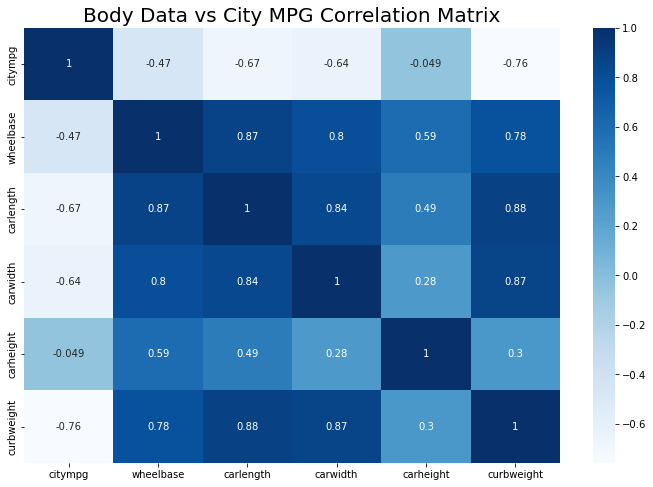

In [145]:
body_city_corr = body_data_city.corr()
display(body_city_corr)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(body_city_corr, cmap="Blues", annot=True)
plt.title("Body Data vs City MPG Correlation Matrix", fontsize=20)
plt.show()

#### Engine Data: **Highway MPG** and **Horsepower** have the strongest linear association with City MPG.

,citympg,price,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,peakrpm
citympg,1.000000,-0.685751,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,0.971337,-0.113544
price,-0.685751,1.000000,0.874145,0.553173,0.079443,0.067984,0.808139,-0.697599,-0.085267
enginesize,-0.653658,0.874145,1.000000,0.583774,0.203129,0.028971,0.809769,-0.677470,-0.244660
boreratio,-0.584532,0.553173,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.587012,-0.254976
stroke,-0.042145,0.079443,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.043931,-0.067964
compressionratio,0.324701,0.067984,0.028971,0.005197,0.186110,1.000000,-0.204326,0.265201,-0.435741
horsepower,-0.801456,0.808139,0.809769,0.573677,0.080940,-0.204326,1.000000,-0.770544,0.131073
highwaympg,0.971337,-0.697599,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,1.000000,-0.054275
peakrpm,-0.113544,-0.085267,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,-0.054275,1.000000


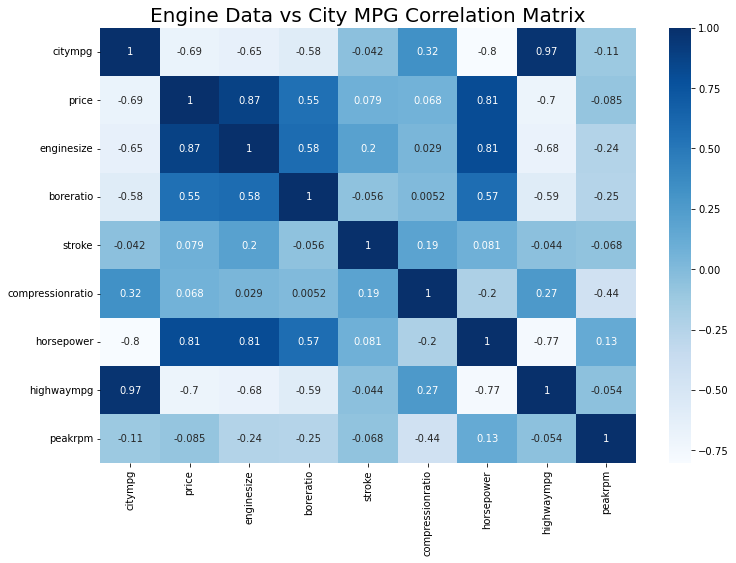

In [146]:
engine_city_corr = engine_data_city.corr()
display(engine_city_corr)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(engine_city_corr, cmap="Blues", annot=True)
plt.title("Engine Data vs City MPG Correlation Matrix", fontsize=20)
plt.show()

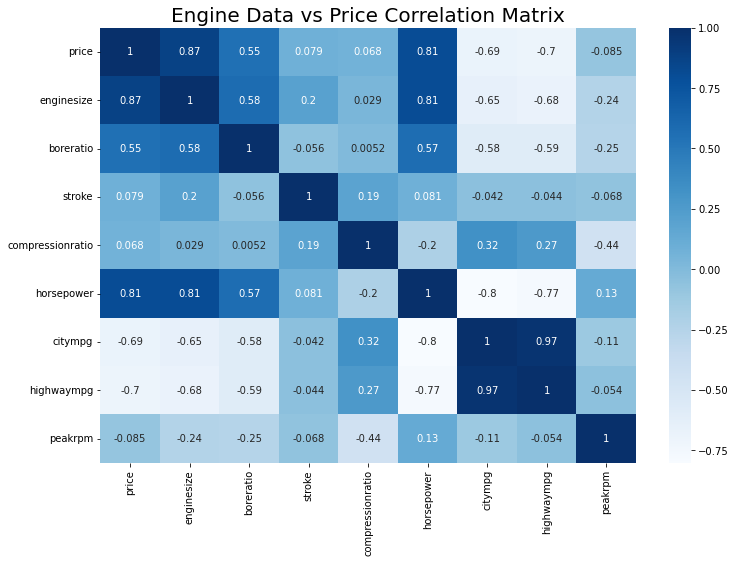

In [57]:
engine_corr = engine_data.corr()
engine_corr

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Engine Data vs Price Correlation Matrix", fontsize=20)
sns.heatmap(engine_corr, cmap="Blues", annot=True)
plt.show()

#### Group Highest Correlated Variables Together

<AxesSubplot:title={'center':'Price Correlation vs Selected Variables Correlation Matrix'}>

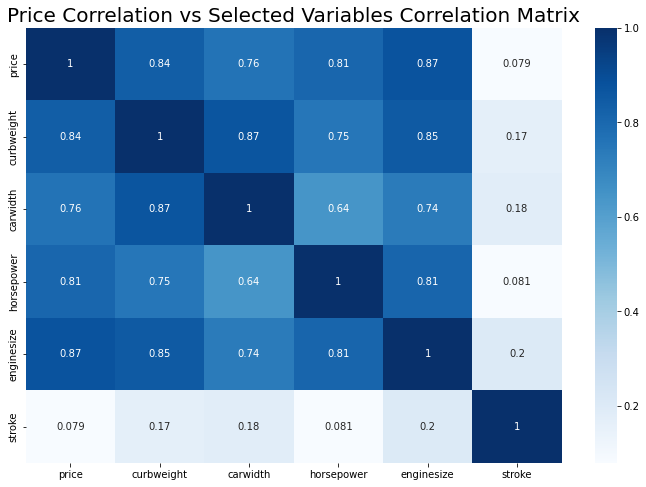

In [58]:
all_corr_data = data[["price", "curbweight", "carwidth", "horsepower", "enginesize", "stroke"]]

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Price Correlation vs Selected Variables Correlation Matrix", fontsize=20)
sns.heatmap(all_corr_data.corr(), cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Enginesize & Stroke vs Price Correlation Matrix'}>

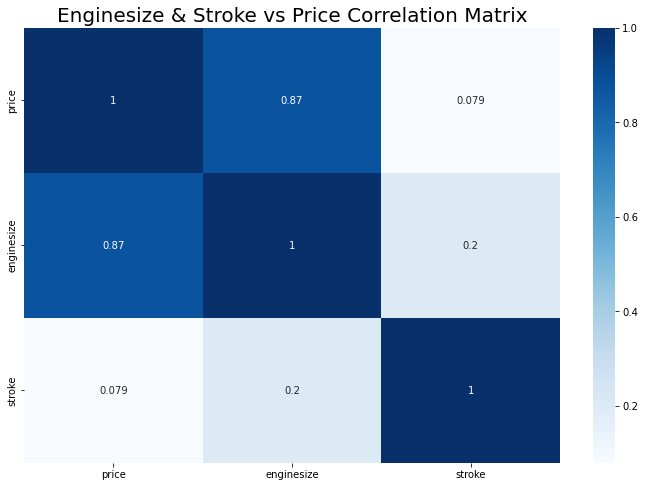

In [59]:
corr_data = data[["price", "enginesize", "stroke"]]

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Enginesize & Stroke vs Price Correlation Matrix", fontsize=20)
sns.heatmap(corr_data.corr(), cmap="Blues", annot=True)


#### Visualize the Selected Variable's Linear Relationships

In [60]:
px.scatter(corr_data, x="price", y="enginesize", title="Engine Size vs Price", trendline="ols")

In [61]:
px.scatter(corr_data, x="price", y="stroke", title="Stroke vs Price", trendline="ols")

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [119]:
from sklearn.model_selection import train_test_split

model_data = corr_data.copy()
X = model_data[["enginesize","stroke"]]
y = model_data["price"].index.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
#lr.fit(X_train, y_train)

In [120]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2888.91058735523
R2 Score: 0.05621173597952478


#### Visualize linear associations (Body Data)

In [65]:
px.scatter(body_data, x="price", y="curbweight", title="Curb Weight vs Price", trendline="ols")

In [66]:
px.scatter(body_data, x="price", y="carwidth", title="Car Width vs Price", trendline="ols")

In [67]:
px.scatter(body_data, x="price", y="carlength", title="Car Length vs Price", trendline="ols")

In [68]:
px.scatter(body_data, x="price", y="wheelbase", title="Wheel Base vs Price", trendline="ols")

#### Visualize linear associations (Engine Data)

In [69]:
px.scatter(engine_data, x="price", y="enginesize", title="Engine Size vs Price", trendline="ols")

In [70]:
px.scatter(engine_data, x="price", y="horsepower", title="Horsepower vs Price", trendline="ols")

In [71]:
#fig, ax = plt.subplots()

px.scatter(engine_data, x="price", y="highwaympg", title="Highway MPG vs Price", trendline="ols")


<AxesSubplot:xlabel='price', ylabel='enginesize'>

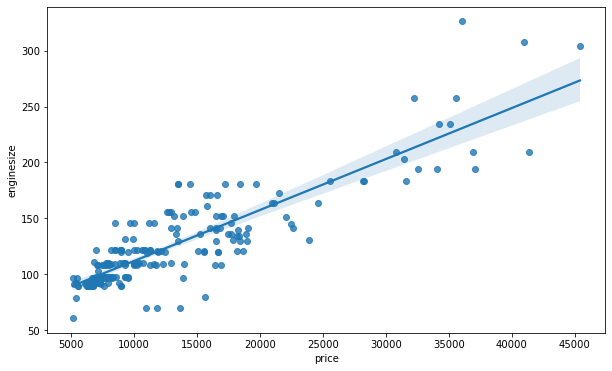

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(data=engine_data, x="price", y="enginesize", scatter=True)

#### Linear Regression Analysis

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [74]:
X = engine_data.drop("price", axis=1)
y = engine_data["price"]

lin_reg = LinearRegression()
kf = KFold(n_splits=5)
cv_engine = cross_val_score(lin_reg, X, y, cv=kf)
cv_engine

array([0.76620261, 0.86005075, 0.22892104, 0.80788431, 0.4110105 ])

In [75]:
cv_engine.mean()

0.6148138417320137

In [76]:
X = body_data.drop("price", axis=1)
y = body_data["price"]

lin_reg = LinearRegression()
kf = KFold(n_splits=5)
cv_body = cross_val_score(lin_reg, X, y, cv=kf)
cv_body.mean()

0.40295784497899784